In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

df = pd.read_csv('seeds_dataset.txt', sep=r'\s+', header=None)

In [100]:
print(df.head())

       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1


In [102]:
print(df.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [104]:
#입력, 타겟 나누기
X = df.iloc[:, :-1].values      
y = df.iloc[:, -1].values - 1  

In [106]:
#훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
#정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

In [112]:
#Sequential함수
model = Sequential()
model.add(Input(shape=(7,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))   
model.add(Dense(units=3, activation='softmax')) 

In [114]:
#categorical
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [116]:
#에포크 전 성능 평가
loss_before, acc_before = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"[Before epoch] 테스트 정확도: {acc_before:.4f}")

[Before epoch] 테스트 정확도: 0.3571


In [118]:
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=8, validation_split=0.2)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3342 - loss: 1.0990 - val_accuracy: 0.5000 - val_loss: 0.8847
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5110 - loss: 0.9008 - val_accuracy: 0.6765 - val_loss: 0.8014
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6323 - loss: 0.8558 - val_accuracy: 0.7647 - val_loss: 0.7360
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7507 - loss: 0.7942 - val_accuracy: 0.8529 - val_loss: 0.6728
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7644 - loss: 0.7487 - val_accuracy: 0.8529 - val_loss: 0.6175
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7914 - loss: 0.6860 - val_accuracy: 0.8824 - val_loss: 0.5624
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8330 - loss: 0.5788 - val_accuracy: 0.8824 - val_loss: 0.5111
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8056 - loss: 0.5587 - val_accuracy: 0.9118 - val_loss:

In [120]:
#에포크 후 성능 평가
loss_after, acc_after = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"[After epoch] 테스트 정확도: {acc_after:.4f}")

[After epoch] 테스트 정확도: 0.9048


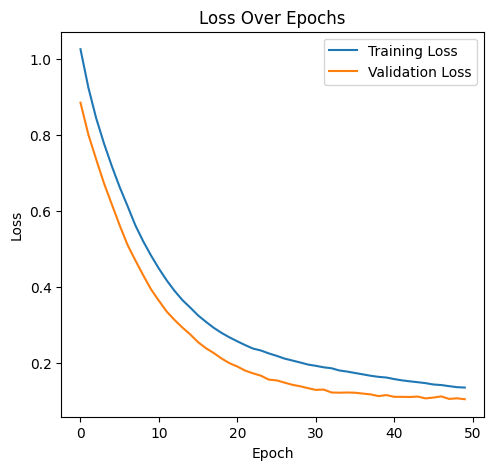

In [124]:
# 학습 중 loss/accuracy 그래프
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

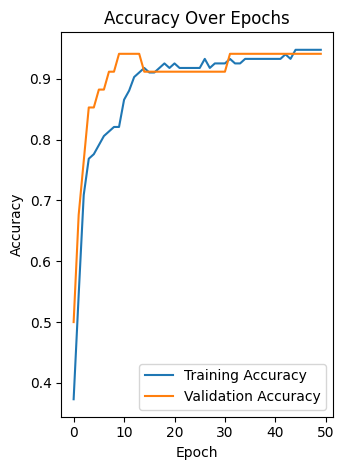

In [126]:
# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

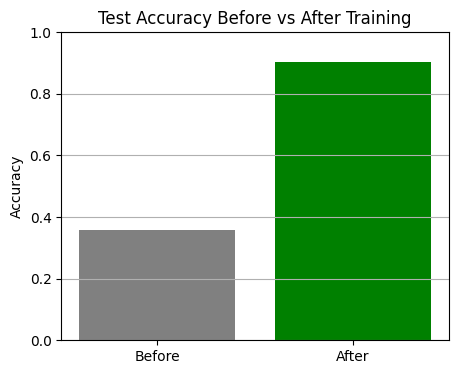

In [130]:
# epoch 전/후 성능 비교 그래프
plt.figure(figsize=(5, 4))
plt.bar(['Before', 'After'], [acc_before, acc_after], color=['gray', 'green'])
plt.title('Test Accuracy Before vs After Training')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()